<a href="https://colab.research.google.com/github/DevLeoo/perfil-invest/blob/main/GUILHERME_SALGADO_LEONARDO_CANDIDO_PROJETO_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Preparação dos dados


In [ ]:
# importando a base de dados
df = pd.read_excel('/content/drive/MyDrive/Inteligência Artificial /dados_bolsa_brasileira.xlsx')

In [ ]:
# visualizando a distribuicao dos dados
df.head()

,TICKER,PRECO,DY,P/L,P/VP,P/ATIVOS,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,P/EBIT,...,PATRIMONIO / ATIVOS,PASSIVOS / ATIVOS,GIRO ATIVOS,CAGR RECEITAS 5 ANOS,CAGR LUCROS 5 ANOS,LIQUIDEZ MEDIA DIARIA,VPA,LPA,PEG Ratio,VALOR DE MERCADO
0,AALR3,23.33,NaN,-11.15,3.04,1.07,30.83,-1.55,-22.50,-162.17,...,0.35,0.63,0.43,0.13,NaN,5.764338e+06,7.67,-2.09,-0.02,2.759771e+09
1,ABCB4,18.30,5.92,5.07,0.78,0.08,32.56,26.15,18.94,3.67,...,0.10,0.90,0.08,18.70,13.83,1.829275e+07,23.46,3.61,0.17,4.137449e+09
2,ABEV3,15.19,5.02,16.23,2.82,1.77,49.71,22.46,18.03,13.03,...,0.63,0.36,0.60,10.72,15.19,3.393834e+08,5.40,0.94,1.70,2.393007e+11
3,ADHM3,1.56,NaN,-4.09,-1.29,105.12,100.00,-13548.48,-18860.61,-5.69,...,-81.72,82.72,0.14,NaN,NaN,NaN,-1.21,-0.38,-0.58,2.543977e+07
4,AERI3,1.55,NaN,-10.22,1.38,0.36,13.11,9.22,-4.20,4.66,...,0.26,0.74,0.84,NaN,NaN,7.696563e+06,1.13,-0.15,0.03,1.172307e+09


In [ ]:
rows, cols = df.shape
print(f'Total de {rows} Linhas \nTotal de {cols} Colunas')

Total de 620 Linhas 
Total de 30 Colunas


In [ ]:
# verificando os tipos e quantidades de valores nao nulos nas colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TICKER                  620 non-null    object 
 1   PRECO                   620 non-null    float64
 2   DY                      342 non-null    float64
 3   P/L                     620 non-null    float64
 4   P/VP                    617 non-null    float64
 5   P/ATIVOS                620 non-null    float64
 6   MARGEM BRUTA            589 non-null    float64
 7   MARGEM EBIT             589 non-null    float64
 8   MARG. LIQUIDA           589 non-null    float64
 9   P/EBIT                  620 non-null    float64
 10  EV/EBIT                 613 non-null    float64
 11  DIVIDA LIQUIDA / EBIT   563 non-null    float64
 12  DIV. LIQ. / PATRI.      485 non-null    float64
 13  PSR                     586 non-null    float64
 14  P/CAP. GIRO             603 non-null    fl

In [ ]:
# renomeando as colunas para facilitar a manipulacao

df.rename(columns={'MARGEM BRUTA': 'margem_bruta', 'MARGEM EBIT': 'margem_EBIT', ' VALOR DE MERCADO': 'valor_de_mercado',
                     'MARG. LIQUIDA': 'margem_liquida','DIVIDA LIQUIDA / EBIT' : 'divida_liquida/ebit',
                     'DIV. LIQ. / PATRI.':'div_liq/patrimonio', 'P/CAP. GIRO': 'preco/capital_giro',
                     'P. AT CIR. LIQ.' : 'preco/ativo_circulante_liquido', 'LIQ. CORRENTE':'liq_corrente', 'PATRIMONIO / ATIVOS':'patrimonio/ativos',
                     'PASSIVOS / ATIVOS': 'passivos/ativos', 'GIRO ATIVOS':'giro_ativos', 'CAGR RECEITAS 5 ANOS': 'CAGR_rec_5_anos',
                     'CAGR LUCROS 5 ANOS':'CAGR_lucro_5_anos',' LIQUIDEZ MEDIA DIARIA': 'liq_media_diaria', 'PEG Ratio': 'peg_ratio'}, inplace = True)

In [ ]:
df.head()

,TICKER,PRECO,DY,P/L,P/VP,P/ATIVOS,margem_bruta,margem_EBIT,margem_liquida,P/EBIT,...,patrimonio/ativos,passivos/ativos,giro_ativos,CAGR_rec_5_anos,CAGR_lucro_5_anos,liq_media_diaria,VPA,LPA,peg_ratio,valor_de_mercado
0,AALR3,23.33,NaN,-11.15,3.04,1.07,30.83,-1.55,-22.50,-162.17,...,0.35,0.63,0.43,0.13,NaN,5.764338e+06,7.67,-2.09,-0.02,2.759771e+09
1,ABCB4,18.30,5.92,5.07,0.78,0.08,32.56,26.15,18.94,3.67,...,0.10,0.90,0.08,18.70,13.83,1.829275e+07,23.46,3.61,0.17,4.137449e+09
2,ABEV3,15.19,5.02,16.23,2.82,1.77,49.71,22.46,18.03,13.03,...,0.63,0.36,0.60,10.72,15.19,3.393834e+08,5.40,0.94,1.70,2.393007e+11
3,ADHM3,1.56,NaN,-4.09,-1.29,105.12,100.00,-13548.48,-18860.61,-5.69,...,-81.72,82.72,0.14,NaN,NaN,NaN,-1.21,-0.38,-0.58,2.543977e+07
4,AERI3,1.55,NaN,-10.22,1.38,0.36,13.11,9.22,-4.20,4.66,...,0.26,0.74,0.84,NaN,NaN,7.696563e+06,1.13,-0.15,0.03,1.172307e+09


In [ ]:
# verificando os valores ausentes
df.isnull().sum() # dados faltantes ou NaN

TICKER                              0
PRECO                               0
DY                                278
P/L                                 0
P/VP                                3
P/ATIVOS                            0
margem_bruta                       31
margem_EBIT                        31
margem_liquida                     31
P/EBIT                              0
EV/EBIT                             7
divida_liquida/ebit                57
div_liq/patrimonio                135
PSR                                34
preco/capital_giro                 17
preco/ativo_circulante_liquido      4
liq_corrente                       33
ROE                                 3
ROA                                 0
ROIC                               57
patrimonio/ativos                   0
passivos/ativos                     0
giro_ativos                         0
CAGR_rec_5_anos                    85
CAGR_lucro_5_anos                 301
liq_media_diaria                  134
VPA         

Identificar e retirar todas as ações que não possuem valor de mercado, ou seja, estão contidas no documento mas não possuem mais valor, seja por quê pararam de ser negociadas, ou não há dados suficientes para o fornecedor dos dados gerar algum valor.

In [ ]:
np.where(df['valor_de_mercado'].isnull().values==True)

(array([ 58,  59, 246, 247, 284, 285, 286]),)

In [ ]:
df = df.drop([58,59,246,247,284,285,286])

Identificar e excluir todas as ações que possuem valores nulos como "liquidez média diária", ou seja, não possuem nenhum dado referente à negociações nos últimos pregões. Isso quer dizer que a ação não está mais em negociação, ou seja, foi comprada por outra empresa ou recomprou suas ações no mercado.

In [ ]:
liq_media_diaria_null_value = np.where(df['liq_media_diaria'].isnull().values==True)
liq_media_diaria_null_value

(array([  3,  16,  24,  25,  28,  29,  50,  54,  76,  82,  83,  84,  88,
         89,  98, 107, 111, 114, 116, 118, 122, 123, 124, 128, 137, 140,
        141, 144, 145, 146, 158, 159, 160, 163, 165, 166, 172, 174, 191,
        198, 215, 220, 221, 222, 223, 227, 228, 233, 234, 249, 260, 261,
        265, 267, 269, 275, 277, 285, 291, 295, 305, 306, 309, 310, 313,
        314, 320, 323, 340, 341, 346, 347, 349, 356, 358, 362, 374, 379,
        380, 381, 388, 390, 396, 398, 399, 408, 409, 410, 411, 412, 418,
        424, 427, 436, 446, 452, 457, 458, 464, 465, 468, 470, 471, 476,
        486, 497, 508, 513, 520, 524, 527, 530, 531, 532, 533, 536, 537,
        557, 560, 561, 562, 564, 567, 568, 574, 595, 597, 598, 601, 602]),)

In [ ]:
df = df.drop([  3,  16,  24,  25,  28,  29,  50,  54,  76,  82,  83,  84,  88, 89,  98, 107, 111, 114, 116, 118, 122, 123, 124, 128, 137, 140,
        141, 144, 145, 146, 158, 159, 160, 163, 165, 166, 172, 174, 191, 198, 215, 220, 221, 222, 223, 227, 228, 233, 234, 249, 260, 261,
        265, 267, 269, 275, 277,291, 295, 305, 306, 309, 310, 313, 314, 320, 323, 340, 341, 346, 347, 349, 356, 358, 362, 374, 379,
        380, 381, 388, 390, 396, 398, 399, 408, 409, 410, 411, 412, 418, 424, 427, 436, 446, 452, 457, 458, 464, 465, 468, 470, 471, 476,
        486, 497, 508, 513, 520, 524, 527, 530, 531, 532, 533, 536, 537, 557, 560, 561, 562, 564, 567, 568, 574, 595, 597, 598, 601, 602])

Na etapa a seguir, todos os dados que constam como NULL foram transformados em 0. Os valores de NULL não foram removidos, por simbolizarem que não há dados suficientes para calcular estes indicadores para tais empresas, o que não invalida a empresa como uma possibilidade de investimento. Um exemplo são os valores de DY que constam como NULL. DY é o calculo de Dividend Yield de uma empresa, ou seja, quanto de lucro que foi distribuído ao acionista dividido pelo valor de mercado da empresa. Se o valor de Dividend Yield é nulo, não quer dizer que haja algo de errado com a empresa, mas apenas que ela não distribui lucros aos seus acionistas, e prefere utilizar o dinheiro para reinvestir no negócio e focar no aumento de sua base de clientes e faturamento. Empresas que não distribuem dividendos costumam ser mais atrativas para investidores mais arrojados, enquanto empresas que distribuem boa parte de seus lucros são interessantes para investidores mais moderados, pois são empresas mais consolidadas que focam em manter sua presença no setor, e tomam decisões menos arriscadas para crescer

In [ ]:
df.loc[df['divida_liquida/ebit'] < 0, 'divida_liquida/ebit'] = 0
df.loc[df['DY'] > 40, 'DY'] = 40
df.loc[df['DY'] < 0, 'DY'] = 0
df.loc[df['margem_liquida'] < 0, 'margem_liquida'] = 0
df.loc[df['liq_media_diaria'] < 0, 'liq_media_diaria'] = 0
df.loc[df['valor_de_mercado'] < 0, 'valor_de_mercado'] = 0
df.loc[df['ROIC'] < 0, 'ROIC'] = 0

In [ ]:
# preenchendo os valores ausentes nao significativos por um substituto
colums_to_replace_with_001 = ['CAGR_rec_5_anos', 'CAGR_lucro_5_anos']

columns_to_fill_with_0 = list(df.columns)
columns_to_fill_with_0 = np.setdiff1d(columns_to_fill_with_0, colums_to_replace_with_001)

df[columns_to_fill_with_0] = df[columns_to_fill_with_0].fillna(0)
df[colums_to_replace_with_001] = df[colums_to_replace_with_001].fillna(0.01)

Uma exceção foi no caso dos indicadores de CAGR de receita e de lucro nos últimos 5 anos. O CAGR representa a média de crescimento, tanto de receita como de lucro nos últimos 5 anos. Nos casos destes indicadores, estarem nulos, não quer dizer que não houve crescimento, pois isto seria simbolizado através de números, mas sim que não há dados suficientes para se calcular tais fatores nos últimos 5 anos,. Isso se dá majoritariamente em empresas que são listadas na bolsa de valores a menos de 5 anos, ou seja, suas receitas e lucros não são públicas há tanto tempo, ou seja, simplesmente não há dados para se calcular este indicador. Por isso, colocamos o valor numérico 1 nesses casos, pois por se tratar de empresas com receitas e lucros milionários, sendo absurdo ter um crescimento de 1 unidade monetária no período. Assim, 1 serve como um indicador numérico de que não há dados no período.

**OBS**: Empresas que têm quedas nas suas receitas e/ou lucros nos útlimos 5 anos possuem um valor de CAGR negativo.

In [ ]:
# verificando se é necessario padronizacao nos campos decimais
has_two_decimal_places = (df.select_dtypes(include='float')
                          .apply(lambda x: x.round(2) == x)
                          .all())

print(has_two_decimal_places)

PRECO                             True
DY                                True
P/L                               True
P/VP                              True
P/ATIVOS                          True
margem_bruta                      True
margem_EBIT                       True
margem_liquida                    True
P/EBIT                            True
EV/EBIT                           True
divida_liquida/ebit               True
div_liq/patrimonio                True
PSR                               True
preco/capital_giro                True
preco/ativo_circulante_liquido    True
liq_corrente                      True
ROE                               True
ROA                               True
ROIC                              True
patrimonio/ativos                 True
passivos/ativos                   True
giro_ativos                       True
CAGR_rec_5_anos                   True
CAGR_lucro_5_anos                 True
liq_media_diaria                  True
VPA                      

In [ ]:
# Por fim, validando se ha dados faltantes

print(df.shape[0])
print(df.info())

484
<class 'pandas.core.frame.DataFrame'>
Int64Index: 484 entries, 0 to 619
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   TICKER                          484 non-null    object 
 1   PRECO                           484 non-null    float64
 2   DY                              484 non-null    float64
 3   P/L                             484 non-null    float64
 4   P/VP                            484 non-null    float64
 5   P/ATIVOS                        484 non-null    float64
 6   margem_bruta                    484 non-null    float64
 7   margem_EBIT                     484 non-null    float64
 8   margem_liquida                  484 non-null    float64
 9   P/EBIT                          484 non-null    float64
 10  EV/EBIT                         484 non-null    float64
 11  divida_liquida/ebit             484 non-null    float64
 12  div_liq/patrimonio              

In [ ]:
df.head()

,TICKER,PRECO,DY,P/L,P/VP,P/ATIVOS,margem_bruta,margem_EBIT,margem_liquida,P/EBIT,...,patrimonio/ativos,passivos/ativos,giro_ativos,CAGR_rec_5_anos,CAGR_lucro_5_anos,liq_media_diaria,VPA,LPA,peg_ratio,valor_de_mercado
0,AALR3,23.33,0.00,-11.15,3.04,1.07,30.83,-1.55,0.00,-162.17,...,0.35,0.63,0.43,0.13,0.01,5.764338e+06,7.67,-2.09,-0.02,2.759771e+09
1,ABCB4,18.30,5.92,5.07,0.78,0.08,32.56,26.15,18.94,3.67,...,0.10,0.90,0.08,18.70,13.83,1.829275e+07,23.46,3.61,0.17,4.137449e+09
2,ABEV3,15.19,5.02,16.23,2.82,1.77,49.71,22.46,18.03,13.03,...,0.63,0.36,0.60,10.72,15.19,3.393834e+08,5.40,0.94,1.70,2.393007e+11
4,AERI3,1.55,0.00,-10.22,1.38,0.36,13.11,9.22,0.00,4.66,...,0.26,0.74,0.84,0.01,0.01,7.696563e+06,1.13,-0.15,0.03,1.172307e+09
5,AESB3,12.54,0.86,59.64,1.71,0.38,33.16,25.99,4.28,9.83,...,0.22,0.72,0.15,0.01,0.01,3.254612e+07,7.31,0.21,0.00,7.542149e+09


## Análise estatística


In [ ]:
df.describe()

,PRECO,DY,P/L,P/VP,P/ATIVOS,margem_bruta,margem_EBIT,margem_liquida,P/EBIT,EV/EBIT,...,patrimonio/ativos,passivos/ativos,giro_ativos,CAGR_rec_5_anos,CAGR_lucro_5_anos,liq_media_diaria,VPA,LPA,peg_ratio,valor_de_mercado
count,484.000000,484.000000,484.000000,4.840000e+02,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,...,484.000000,484.000000,484.000000,484.000000,484.000000,4.840000e+02,484.000000,484.000000,484.000000,4.840000e+02
mean,23.241364,3.410000,-123.078905,-3.576222e+03,69.897686,-16.588140,43.396508,131.225620,16.008967,14.410888,...,0.125455,0.858099,0.584897,12.850083,8.776405,4.147243e+07,22.901983,8.276157,1.549401,1.261878e+10
std,49.994501,5.884788,3619.227207,7.870268e+04,1511.564220,440.858073,1027.084580,857.007746,297.410724,312.685114,...,1.584383,1.587909,0.571785,37.180738,22.999692,1.542832e+08,418.687155,74.581067,36.422383,4.114864e+10
min,0.000000,0.000000,-78669.160000,-1.731457e+06,0.000000,-3940.130000,-18852.940000,0.000000,-2130.910000,-2963.140000,...,-25.350000,0.000000,-0.430000,-75.290000,-65.660000,0.000000e+00,-3881.950000,-311.650000,-52.040000,0.000000e+00
25%,4.657500,0.000000,0.000000,5.200000e-01,0.160000,17.965000,2.820000,0.000000,0.030000,1.242500,...,0.140000,0.460000,0.170000,0.010000,0.010000,5.191453e+03,2.945000,0.000000,-0.270000,2.465428e+08
50%,11.310000,1.025000,6.285000,1.065000e+00,0.415000,30.720000,11.475000,5.740000,4.300000,6.380000,...,0.330000,0.655000,0.455000,9.605000,0.010000,2.278279e+05,8.565000,0.770000,0.000000,1.517046e+09
75%,23.887500,5.025000,13.300000,2.020000e+00,0.852500,47.232500,25.222500,16.055000,9.280000,11.250000,...,0.500000,0.842500,0.862500,19.065000,13.522500,1.403552e+07,18.072500,2.760000,0.112500,8.048554e+09
max,702.500000,40.000000,7769.910000,1.210310e+03,33255.410000,111.740000,8930.970000,13896.670000,5446.380000,5446.380000,...,1.000000,26.350000,4.530000,367.940000,195.340000,2.135044e+09,5448.960000,959.910000,788.930000,4.268524e+11


In [ ]:
#Tabela de correlação
corr = df.corr()

<ipython-input-20-123b64d51fe1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


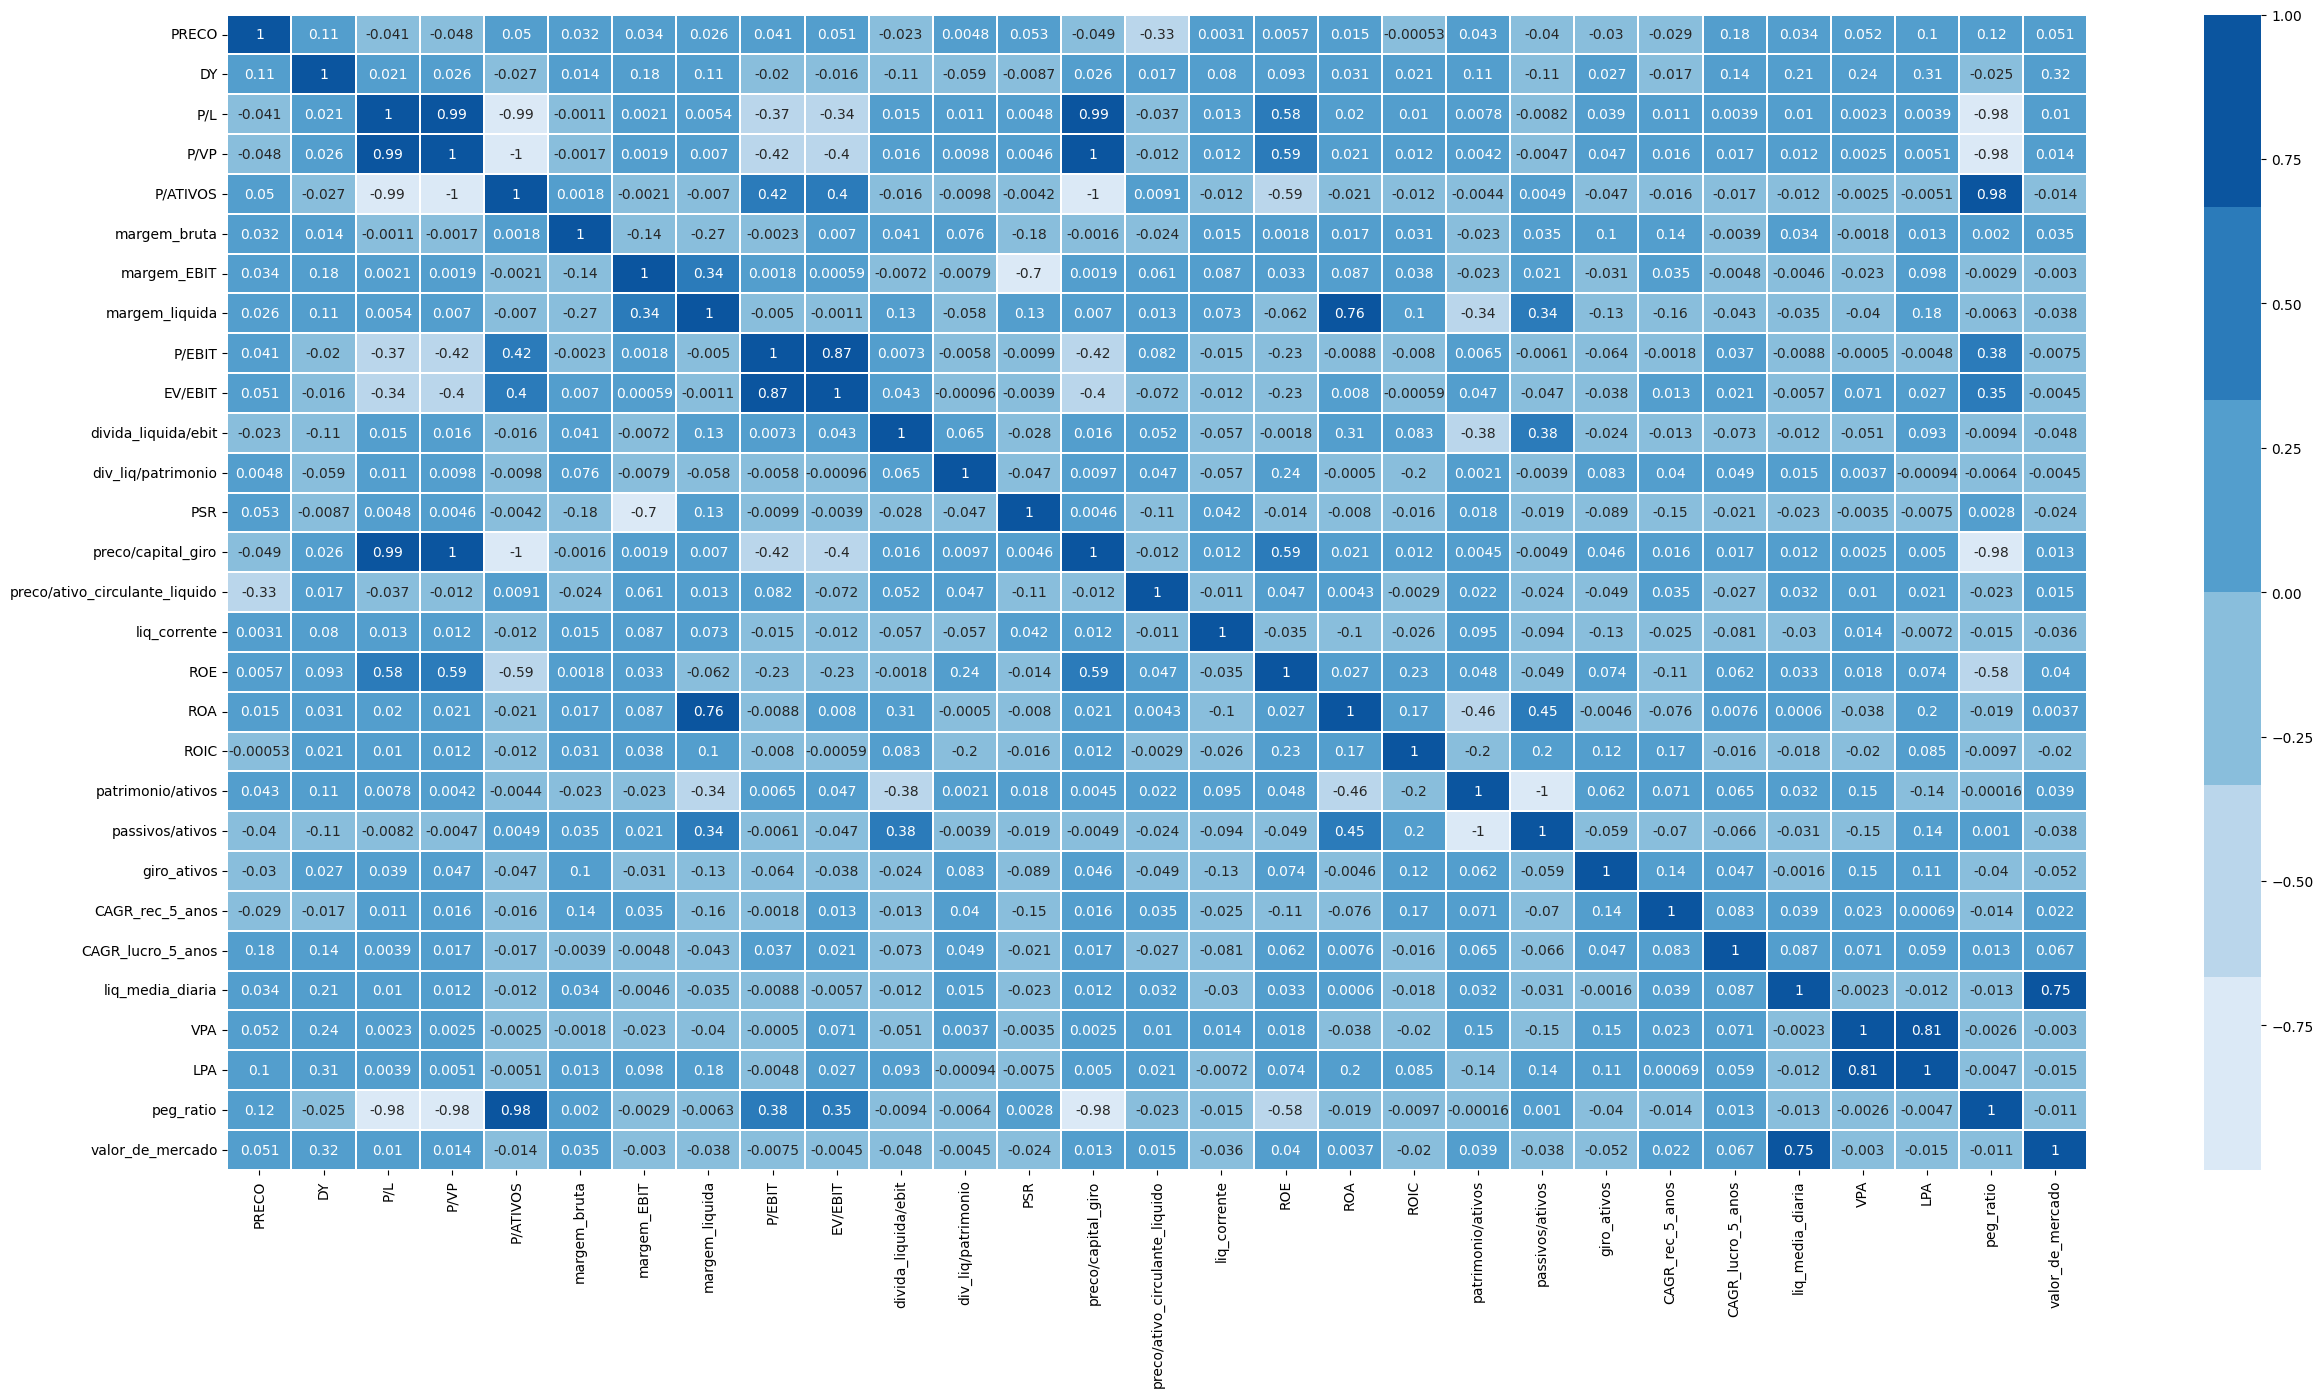

In [ ]:
# Melhor visualização  da correlação
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(30, 15))
sns.heatmap(corr, cmap=sns.color_palette("Blues"), linewidths=.2, annot=True);

## Testes e Validação

In [ ]:
selected_fields_to_group = {
    "0": ['DY', 'divida_liquida/ebit', 'div_liq/patrimonio', 'CAGR_rec_5_anos', 'CAGR_lucro_5_anos'],
    "1": ['DY','CAGR_lucro_5_anos', 'liq_media_diaria', 'P/L', 'margem_liquida'],
    "2": ['liq_media_diaria', 'P/L', 'margem_liquida', 'ROIC', 'VPA'],
    "3": ['liq_media_diaria', 'DY', 'margem_liquida', 'divida_liquida/ebit', 'VPA'],
    "4": ['CAGR_rec_5_anos', 'margem_liquida', 'VPA', 'P/ATIVOS', 'divida_liquida/ebit']
}

Rodar a Clusterização e Realiza o cálculo da validação

In [ ]:
test_df = df.copy()

cluster_statistics = {
    0: {2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {}, 10: {}, 11: {}},
    1: {2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {}, 10: {}, 11: {}},
    2: {2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {}, 10: {}, 11: {}},
    3: {2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {}, 10: {}, 11: {}},
    4: {2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {}, 10: {}, 11: {}}
}

sse = {0: [], 1: [], 2: [], 3: [], 4: []}

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import numpy as np

for index_group in range(0, len(selected_fields_to_group)):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(test_df[selected_fields_to_group.get(str(index_group))])

    # List to store silhouette scores
    silhouette_scores = []

    # Test different values of k
    for k in range(2, 12):
        # Apply K-means
        kmeans = KMeans(n_clusters=k, n_init=10)
        kmeans.fit(scaled_data)

        sse[index_group].append(kmeans.inertia_)
        # Get cluster labels
        cluster_labels = kmeans.labels_

        # Calculate silhouette score
        silhouette_avg = silhouette_score(scaled_data, cluster_labels)
        silhouette_scores.append(silhouette_avg)

        # Iterate over unique cluster labels and create dataframes for each cluster
        for cluster_id in set(cluster_labels):
            cluster_values = scaled_data[cluster_labels == cluster_id]
            cluster_dataframe = pd.DataFrame(cluster_values)
            cluster_describe = cluster_dataframe.describe()
            cluster_statistics[index_group][k][str(cluster_id)] = {
                "mean": cluster_describe.loc["mean"],
                "std":  cluster_describe.loc["std"]
            }

    for k, score in enumerate(silhouette_scores, start=2):
          print(f"K = {k}, Group  {index_group} Silhouette Score: {score}")
    print("----------------------------------------------------")

K = 2, Group  0 Silhouette Score: 0.7149315031713313
K = 3, Group  0 Silhouette Score: 0.6870411184354597
K = 4, Group  0 Silhouette Score: 0.32096654915048195
K = 5, Group  0 Silhouette Score: 0.3597130128400577
K = 6, Group  0 Silhouette Score: 0.39941620269547845
K = 7, Group  0 Silhouette Score: 0.30696201777988796
K = 8, Group  0 Silhouette Score: 0.31981969226403106
K = 9, Group  0 Silhouette Score: 0.30947166985875996
K = 10, Group  0 Silhouette Score: 0.3225431806609595
K = 11, Group  0 Silhouette Score: 0.31340230520682094
----------------------------------------------------
K = 2, Group  1 Silhouette Score: 0.9116948060008507
K = 3, Group  1 Silhouette Score: 0.501250649614624
K = 4, Group  1 Silhouette Score: 0.5156868377685532
K = 5, Group  1 Silhouette Score: 0.4864750313167653
K = 6, Group  1 Silhouette Score: 0.4972148140214444
K = 7, Group  1 Silhouette Score: 0.4256472107847225
K = 8, Group  1 Silhouette Score: 0.4353047633469669
K = 9, Group  1 Silhouette Score: 0.464

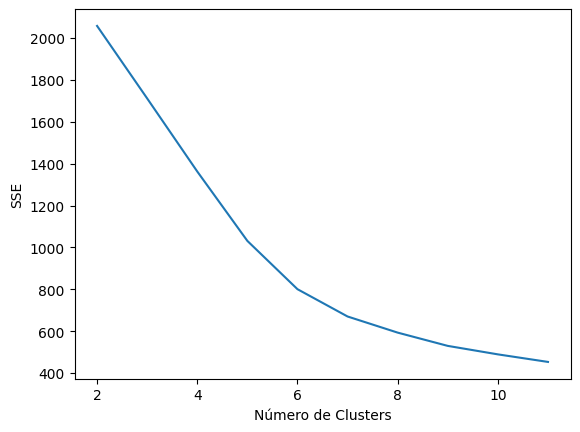

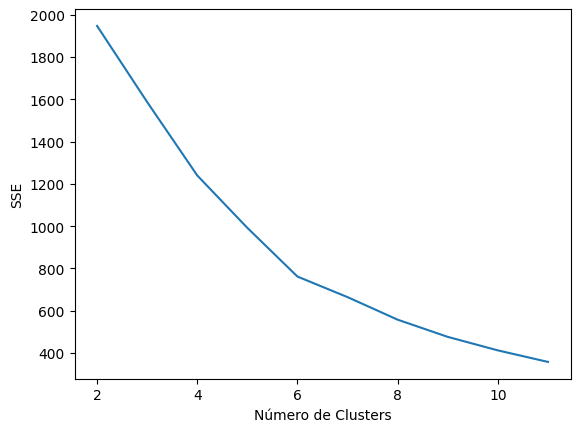

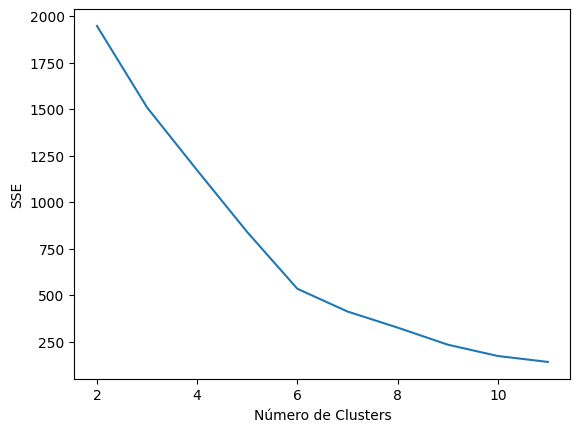

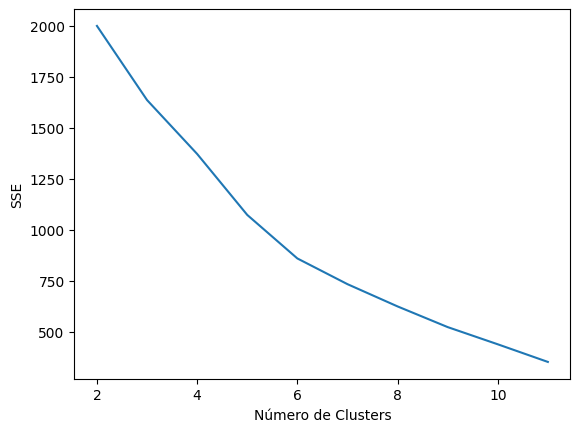

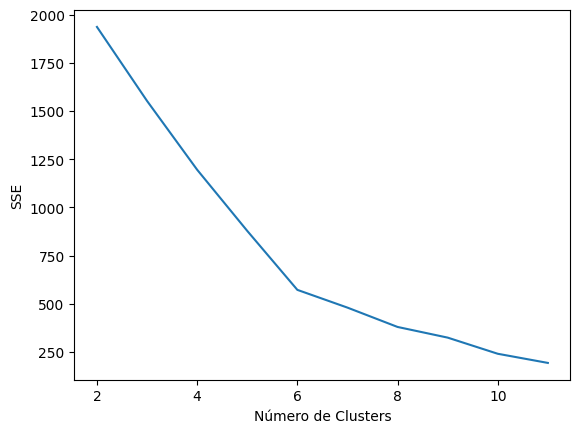

In [ ]:
# Validacao por elbow Score
import matplotlib.pyplot as plt

for index_key in sse.keys():
  plt.plot(range(2, 12), sse.get(index_key))
  plt.xlabel('Número de Clusters')
  plt.ylabel('SSE')
  plt.show()

In [ ]:
import pprint

pp = pprint.PrettyPrinter()
print("Group 0")
pp.pprint(cluster_statistics[0])
print("--------------------------->")
print("Group 1")
pp.pprint(cluster_statistics[1])
print("--------------------------->")
print("Group 2")
pp.pprint(cluster_statistics[2])
print("--------------------------->")
print("Group 3")
pp.pprint(cluster_statistics[3])
print("--------------------------->")
print("Group 4")
pp.pprint(cluster_statistics[4])

Group 0
{2: {'0': {'mean': 0    0.010590
1   -0.124897
2    0.000252
3    0.005165
4    0.006944
Name: mean, dtype: float64,
           'std': 0    1.008551
1    0.387049
2    1.010354
3    1.010634
4    1.010146
Name: std, dtype: float64},
     '1': {'mean': 0   -0.501981
1    5.920132
2   -0.011938
3   -0.244817
4   -0.329145
Name: mean, dtype: float64,
           'std': 0    0.183622
1    2.478073
2    0.357873
3    0.174844
4    0.165712
Name: std, dtype: float64}},
 3: {'0': {'mean': 0    0.839675
1   -0.205164
2   -0.030678
3    0.097398
4    0.910266
Name: mean, dtype: float64,
           'std': 0    1.402120
1    0.190955
2    0.416545
3    0.462934
4    1.235641
Name: std, dtype: float64},
     '1': {'mean': 0   -0.374015
1    0.097556
2    0.017756
3   -0.172175
4   -0.408610
Name: mean, dtype: float64,
           'std': 0    0.338629
1    1.195414
2    1.180609
3    0.502761
4    0.482522
Name: std, dtype: float64},
     '2': {'mean': 0   -0.580060
1   -0.264234
2   -0.24797

### Implementação do K-Medoids

In [ ]:
!pip install scikit-learn-extra

In [ ]:
test_df_md = df.copy()

cluster_statistics_md = {
    0: {2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {}, 10: {}, 11: {}},
    1: {2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {}, 10: {}, 11: {}},
    2: {2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {}, 10: {}, 11: {}},
    3: {2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {}, 10: {}, 11: {}},
    4: {2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {}, 10: {}, 11: {}}
}

sse_md = {0: [], 1: [], 2: [], 3: [], 4: []}
elbow_scores_md = {0: [], 1: [], 2: [], 3: [], 4: []}

In [ ]:
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import numpy as np

for index_group in range(0, len(selected_fields_to_group)):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(test_df_md[selected_fields_to_group.get(str(index_group))])

    # List to store silhouette scores
    silhouette_scores_md = []

    # Test different values of k
    for k in range(2,  ):
        # Apply K-medoids
        kmedoids = KMedoids(n_clusters=k, random_state=0)
        kmedoids.fit(scaled_data)

        sse_md[index_group].append(kmedoids.inertia_)
        # Get cluster labels
        cluster_labels = kmedoids.labels_

        # Calculate silhouette score
        silhouette_avg = silhouette_score(scaled_data, cluster_labels)
        silhouette_scores_md.append(silhouette_avg)

        # Iterate over unique cluster labels and create dataframes for each cluster
        for cluster_id in set(cluster_labels):
            cluster_indices = np.where(cluster_labels == cluster_id)[0]
            cluster_values = scaled_data[cluster_indices]
            cluster_dataframe = pd.DataFrame(cluster_values)
            cluster_describe = cluster_dataframe.describe()
            cluster_statistics_md[index_group][k][str(cluster_id)] = {
                "mean": cluster_describe.loc["mean"],
                "std": cluster_describe.loc["std"]
            }

    for k, score in enumerate(silhouette_scores_md, start=2):
        print(f"K = {k}, Group  {index_group} Silhouette Score: {score}")


    print("----------------------------------------------------")

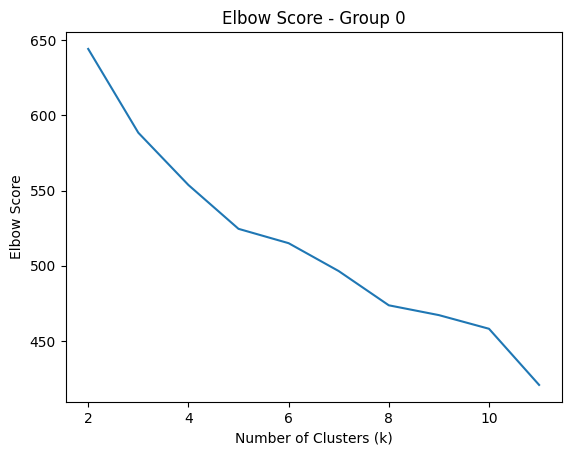

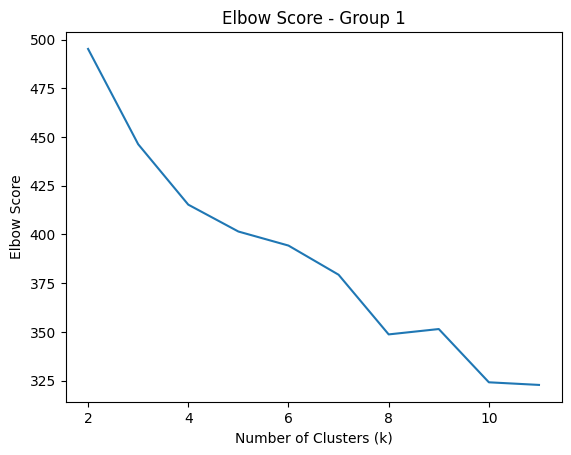

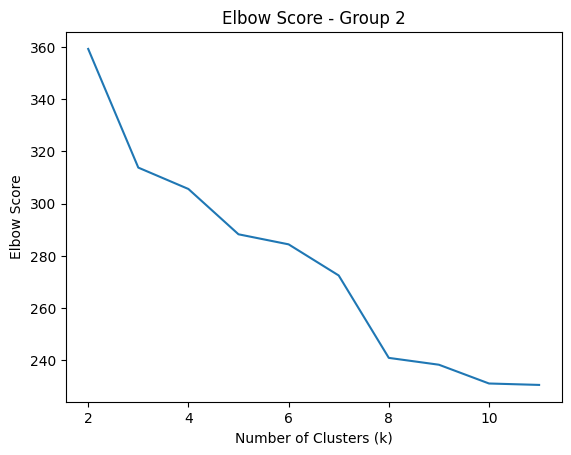

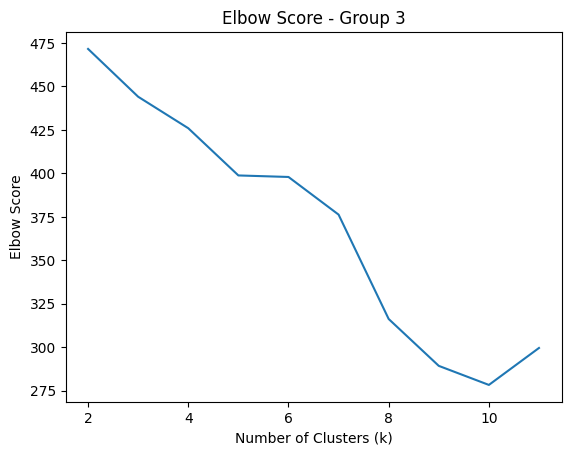

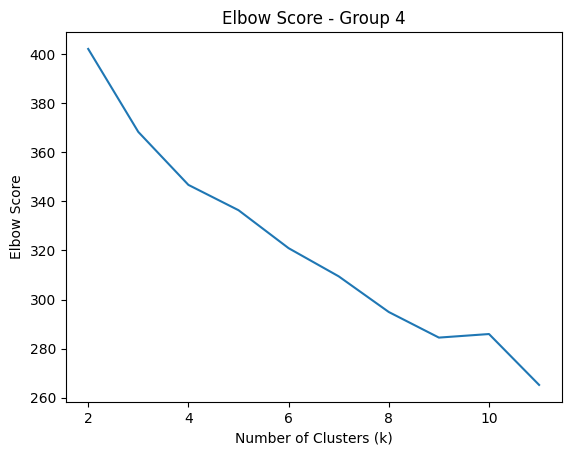

In [ ]:
# Plot the elbow scores
for elbow_index_key in sse_md.keys():
  plt.plot(range(2, 12), sse_md.get(elbow_index_key))
  plt.xlabel('Number of Clusters (k)')
  plt.ylabel('Elbow Score')
  plt.title(f'Elbow Score - Group {elbow_index_key}')
  plt.show()

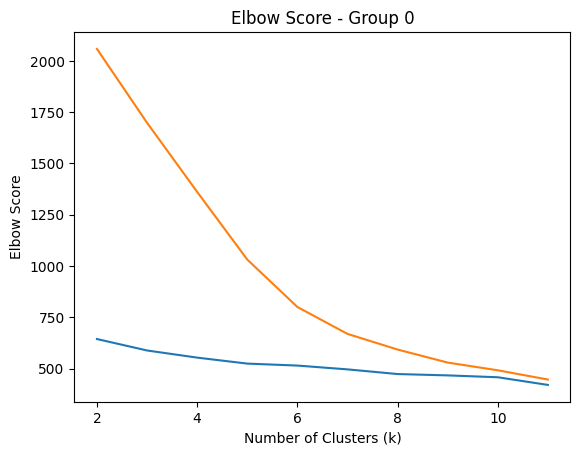

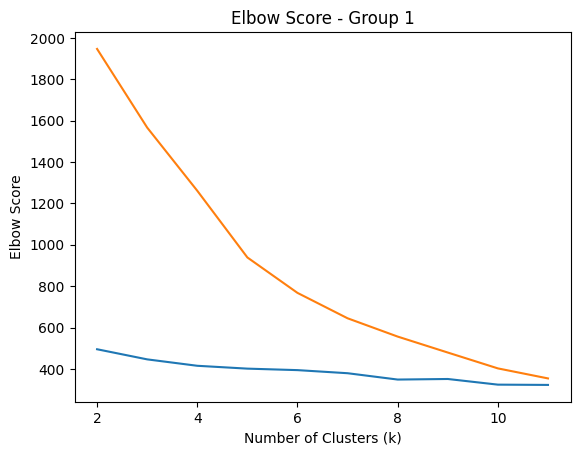

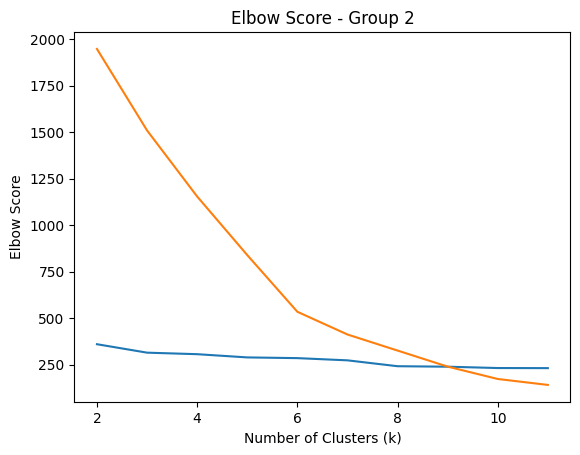

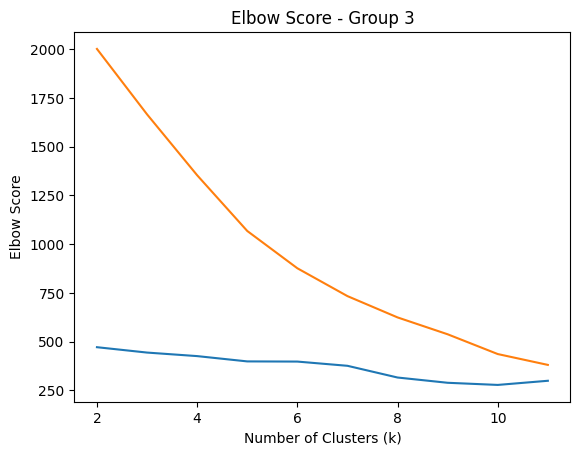

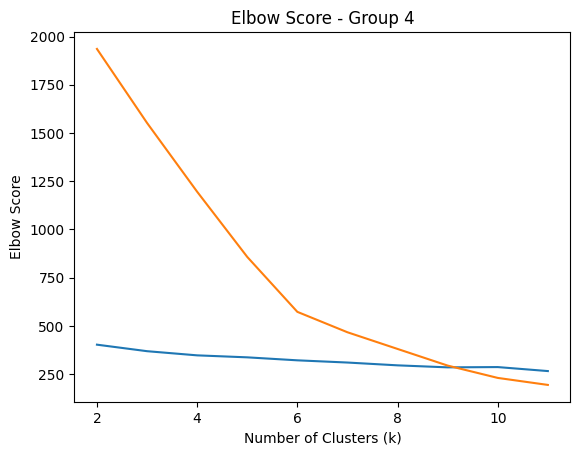

In [ ]:
# Grafico com curvas do kmeans e kmedoids
# Plot the elbow scores
for index in sse.keys():
  plt.plot(range(2, 12), sse_md.get(index))
  plt.plot(range(2, 12), sse.get(index))
  plt.xlabel('Number of Clusters (k)')
  plt.ylabel('Elbow Score')
  plt.title(f'Elbow Score - Group {index}')
  plt.show()